# Data scraping, data wrangling, data analytics, exploratory data analysis, advaced plotting and clustering with love.

In this final tutorial we address clustering and advanced plotting. 

Unsupervised learning or clustering consists in finding hidden structures in unlabelled data. We are going to use k-means clustering [1], which is included with **scipy** [2]. 

As we already have seen, the dataset is labelled. Nevertheless, we are going to compare the solution obtained with k-means clustering and the labelled data.

Finally, we are going to do advanced plotting using **matplotlib** [3] and **seaborn** [4].

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#import json
#import seaborn as sns

Let's use **pandas** [5] to load the csv file and use column 0 in the dataset as the row labels of the created `DataFrame`,


In [3]:
#shot_df = pd.read_csv('test.csv')
#shot_df = pd.read_csv(filepath_or_buffer='test.csv')
shot_df = pd.read_csv(filepath_or_buffer='test.csv',index_col=0)


To display the information in `shot_df` (we only display the first 4 rows),

In [4]:
shot_df.head(4)


,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
0,Shot Chart Detail,21400018,4,2544,LeBron James,1610612739,Cleveland Cavaliers,1,11,20,...,Jump Shot,2PT Field Goal,Mid-Range,Right Side Center(RC),16-24 ft.,18,114,148,1,0
1,Shot Chart Detail,21400018,33,2544,LeBron James,1610612739,Cleveland Cavaliers,1,6,30,...,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,-7,0,1,1
2,Shot Chart Detail,21400018,53,2544,LeBron James,1610612739,Cleveland Cavaliers,1,4,45,...,Fadeaway Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),8-16 ft.,12,-105,63,1,0
3,Shot Chart Detail,21400018,77,2544,LeBron James,1610612739,Cleveland Cavaliers,1,2,31,...,Jump Shot,3PT Field Goal,Right Corner 3,Right Side(R),24+ ft.,22,227,-16,1,0


To force **pandas** to display all the columns, you can proceed as follows,

In [5]:
#uncomment this line to display all the columns
#pd.set_option('display.max_columns', None)

#shot_df.head(4)


These are the **scipy** modules we need to do clustering.  We are going to use the `rand` function of **numpy** to generate random points.

In [6]:
#from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq,whiten


Let's illustrate clustering by using a simple illustrative example.  First we are going to create two datasets and then we are going to use k-means clustering.

In [7]:
# data generation
data1 = rand(50,2) + np.array([.5,.5])
data2 = rand(50,2) + np.array([0,-.2])

#data1 = rand(200,2) + np.array([.5,.5])
#data2 = rand(200,2) + np.array([0,-.2])


Now we plot the two datasets using **matplotlib**,

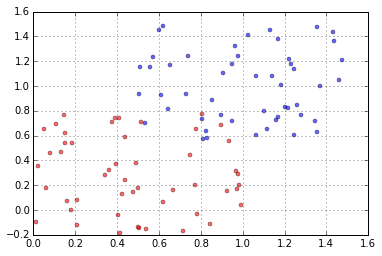

In [8]:
plt.plot(data1[:,0],data1[:,1],'ob',markersize=4, alpha=0.6)
plt.plot(data2[:,0],data2[:,1],'or',markersize=4, alpha=0.6)
plt.grid()
plt.show()


To do clustering, we need one single dataset.  To join the datasets we can use the `concatenate` function,

In [9]:
jdata1=np.concatenate((data1,data2))


or we can use the `vstack` function,

In [10]:
jdata2=np.vstack((data1,data2))


To check the dimension of the newly created datasets,

In [11]:
jdata1.shape

(100, 2)

In [12]:
jdata2.shape

(100, 2)

To check the object type of the newly created datasets,

In [13]:
type(jdata1)

numpy.ndarray

In [14]:
type(jdata2)

numpy.ndarray

To check the data type of the **numpy** arrays,

In [15]:
jdata1.dtype

dtype('float64')

In [16]:
jdata2.dtype

dtype('float64')

And to check that the two arrays are equal,

In [17]:
np.array_equal(jdata1,jdata2)


True

or in the long way,

In [18]:
#uncomment this line to compare the arrays
#jdata1==jdata2


To plot the joined dataset using **matplotlib**,

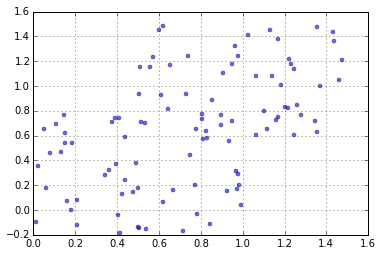

In [19]:
# some plotting using numpy's logical indexing
plt.plot(jdata1[:,0],jdata1[:,1],'ob',markersize=4, alpha=0.6)
plt.grid()
plt.show()


To compute the clusters using K-means we proceed as follows.  

First we need to compute the centroids, in this case the centroids are choosen randomly.  Alternatively, the user have the option to give the inital position of the centroids. 

In this case we want to use 2 centroids on the dataset `jdata1` and the centroid position is saved in the array `centroids`,

In [20]:
# computing K-Means with K = 2 (2 clusters)
centroids,_ = kmeans(jdata1,2)


To print the information in the array `centroids`,

In [21]:
#from pprint import pprint
#pprint(centroids)

#centroids

print(centroids)


[[ 1.00677754  0.98402234]
 [ 0.45237633  0.26592174]]


Now we proceed to label the data using the array `centroids`, for this we use the function `vq`.  

This function assigns a label to each observation. Each observation in the input array is compared with the centroids in the label vector and assigned the label of the closest centroid.

In [22]:
# assign each sample to a cluster
idx,_ = vq(jdata1,centroids)

#whiten is used to normalize a group of observations on a per feature basis.
#whitened = whiten(jdata1)
#idx,_ = vq(whitened,centroids)


Tp print the information in the array idx,

In [23]:
print(idx)

#print(idx[0:4])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1]


Let's plot the clusters and the centroid information.

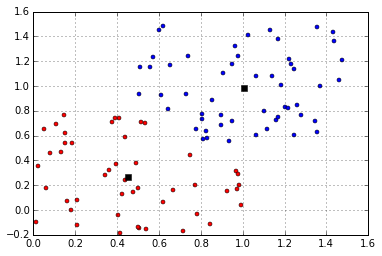

In [24]:
# some plotting using numpy's logical indexing
plt.plot(jdata1[idx==0,0],jdata1[idx==0,1],'ob',markersize=4, alpha=1)
plt.plot(jdata1[idx==1,0],jdata1[idx==1,1],'or',markersize=4, alpha=1)

plt.plot(centroids[:,0],centroids[:,1],'sk',markersize=6)

plt.grid()
plt.show()


Let's group the arrays `jdata1` and `idx` in a `DataFrame`.  First we need to create an empty `DataFrame`,

In [25]:
cluster1=pd.DataFrame()


Now we can copy the arrays into the `DataFrame cluster1` as follows,

In [26]:
cluster1['X']=jdata1[:,0]
cluster1['Y']=jdata1[:,1]
cluster1['LABEL']=idx


To display the information in `cluster1` (we display the first 10 rows),

In [27]:
cluster1.head(10)


,X,Y,LABEL
0,0.598751,1.454361,0
1,0.730617,0.935743,0
2,0.950706,0.715999,0
3,0.558754,1.151999,0
4,1.026294,1.414251,0
5,1.276246,0.764479,0
6,1.131869,1.451615,0
7,0.607382,0.930999,0
8,0.895775,0.764318,0
9,1.115219,0.651737,0


To display the last 5 rows in `cluster1`,

In [28]:
cluster1.tail()


,X,Y,LABEL
95,0.374767,0.706891,1
96,0.716812,-0.172654,1
97,0.619051,0.061293,1
98,0.978450,0.290588,1
99,0.971440,0.171516,1


At this point we have created the `DataFrame cluster1`, which you can use to do some plotting or conduct some data analytics as we have done in the previous tutorials.

Let's complicate things a little bit more.  In this example we are going to generate a bigger dataset with a different structure.

In [29]:
# data generation
data1 = rand(200,2) + np.array([10,1])
data2 = rand(200,2) + np.array([9,0.5])
data3 = rand(200,2) + np.array([9.5,0])


To pot the original datasets,

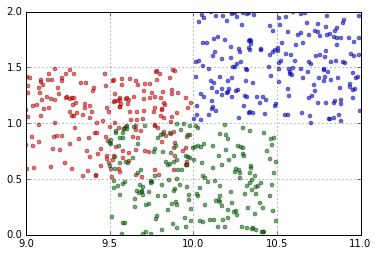

In [30]:
# some plotting using numpy's logical indexing
plt.plot(data1[:,0],data1[:,1],'ob',markersize=4, alpha=0.6)
plt.plot(data2[:,0],data2[:,1],'or',markersize=4, alpha=0.6)
plt.plot(data3[:,0],data3[:,1],'og',markersize=4, alpha=0.6)

plt.grid()
plt.show()


Remember, to do the clustering we need one single dataset, to concatenate the arrays we proceed as follows,

In [31]:
jdata1=np.concatenate((data1,data2,data3))


Now we can compute the clusters.  Notice that we are using 3 centroids.

In [32]:
# computing K-Means with K = 2 (2 clusters)
centroids,_ = kmeans(jdata1,3)
# assign each sample to a cluster
idx,_ = vq(jdata1,centroids)
#vq(data,centroids)


Let's create a `DataFrame`,


In [33]:
cluster2=pd.DataFrame()
cluster2['X']=jdata1[:,0]
cluster2['Y']=jdata1[:,1]
cluster2['LABEL']=idx


Let's plot the clusters and the centroid information.

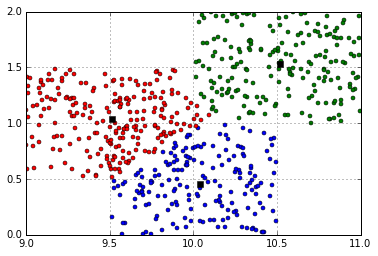

In [34]:
plt.plot(jdata1[idx==0,0],jdata1[idx==0,1],'ob',markersize=4, alpha=1)
plt.plot(jdata1[idx==1,0],jdata1[idx==1,1],'or',markersize=4, alpha=1)
plt.plot(jdata1[idx==2,0],jdata1[idx==2,1],'og',markersize=4, alpha=1)

plt.plot(centroids[:,0],centroids[:,1],'sk',markersize=6)

plt.grid()
plt.show()


To compare the original data and the computed clusters using `subplot` in **matplotlib**,

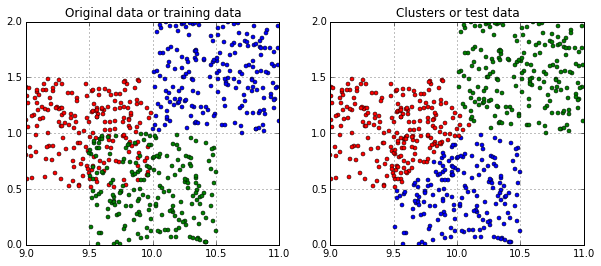

In [52]:
#fig = plt.figure()
plt.figure(figsize=(10, 4))

ax = plt.subplot(121)
ax.set_title("Original data or training data")
ax.plot(data1[:,0],data1[:,1],'ob',markersize=4, alpha=1)
ax.plot(data2[:,0],data2[:,1],'or',markersize=4, alpha=1)
ax.plot(data3[:,0],data3[:,1],'og',markersize=4, alpha=1)
ax.grid()

ax = plt.subplot(122)
ax.set_title("Clusters or test data")
#ax.plot(jdata1[idx==0,0],jdata1[idx==0,1],'ob',markersize=4, alpha=1)
#ax.plot(jdata1[idx==1,0],jdata1[idx==1,1],'or',markersize=4, alpha=1)
#ax.plot(jdata1[idx==2,0],jdata1[idx==2,1],'og',markersize=4, alpha=1)
ax.plot(cluster2.X[cluster2.LABEL == 0],cluster2.Y[cluster2.LABEL == 0],'ob',markersize=4, alpha=1)
ax.plot(cluster2.X[cluster2.LABEL == 1],cluster2.Y[cluster2.LABEL == 1],'or',markersize=4, alpha=1)
ax.plot(cluster2.X[cluster2.LABEL == 2],cluster2.Y[cluster2.LABEL == 2],'og',markersize=4, alpha=1)
ax.grid()

plt.show()


To add reusability and automation to the plotting, let's add a loop when plotting the data.  Let's use 10 centroids to illustrate the advantage of using a loop at plot time,

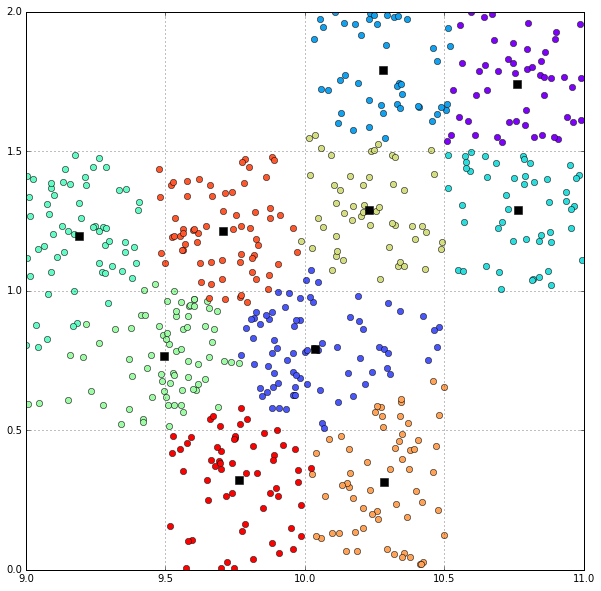

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.figure(figsize=(10,10))

#number of centroids
cd=10

centroids,_ = kmeans(jdata1,cd)

idx,_ = vq(jdata1,centroids)

#colors = cm.rainbow(np.linspace(0, 1, cd))
colors=iter(cm.rainbow(np.linspace(0,1,cd)))

for tt in range(cd):
    
    c=next(colors)
    
    #plot(data_s1[idx== tt,0],data_s1[idx== tt,1],'o')
    plt.plot(jdata1[idx== tt,0],jdata1[idx== tt,1],'o', c=c)
    

plt.plot(centroids[:,0],centroids[:,1],'sk',markersize=8)

plt.grid()
plt.show()


Now that we introduced the basic notions of clustering using **scipy**, let's compute the clusters for the data `shot_df` or Lebron James shot chart.

The first thing to do is to create a `DataFrame` where we are going to put the information of **LOC_X** and **LOC_Y**.

In [37]:
stmp=pd.DataFrame()
stmp['LOC_X']=shot_df.LOC_X
stmp['LOC_Y']=shot_df.LOC_Y


To display the first 5 rows of `stmp`,

In [38]:
stmp.head()


,LOC_X,LOC_Y
0,114,148
1,-7,0
2,-105,63
3,227,-16
4,91,246


To use k-means with **scipy** we need to convert the **pandas** `DataFrame` into a **numpy** array.

In [39]:
stmp1=stmp.as_matrix(columns=None)


To know the type of `stmp1`,

In [40]:
type(stmp1)


numpy.ndarray

which have a data type,

In [41]:
stmp1.dtype


dtype('int64')

However, k-means in **scipy** only supports `float` or `double` data type.  To convert a `int64` to `float`, we proceed as follows,

In [42]:
#type other than float or double not supported
data_s1=stmp1.astype(float)
data_s1.dtype


dtype('float64')

To print the **numpy** array `data_s1`,

In [43]:
print(data_s1)

[[ 114.  148.]
 [  -7.    0.]
 [-105.   63.]
 ..., 
 [-116.  168.]
 [ -48.   61.]
 [-199.   77.]]


Now we can compute the clusters (centroids and data labelling).  

Notice that we are using 6 centroids.

In [44]:
#centroids,_ = kmeans(stmp1,10)
centroids,_ = kmeans(data_s1,6)
idx,_ = vq(data_s1,centroids)

To plot the positions of the centroids,

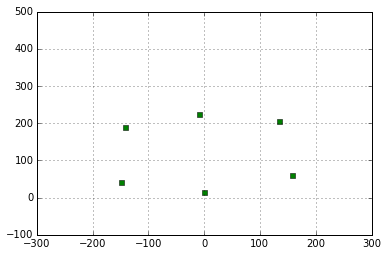

In [45]:
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=5)

plt.xlim(-300,300)
plt.ylim(-100,500)

plt.grid()
plt.show()


Now we can plot the clusters.  

Have in mind that you can change the number of clusters with the variable `cd`, in this case we are using 6 clusters.

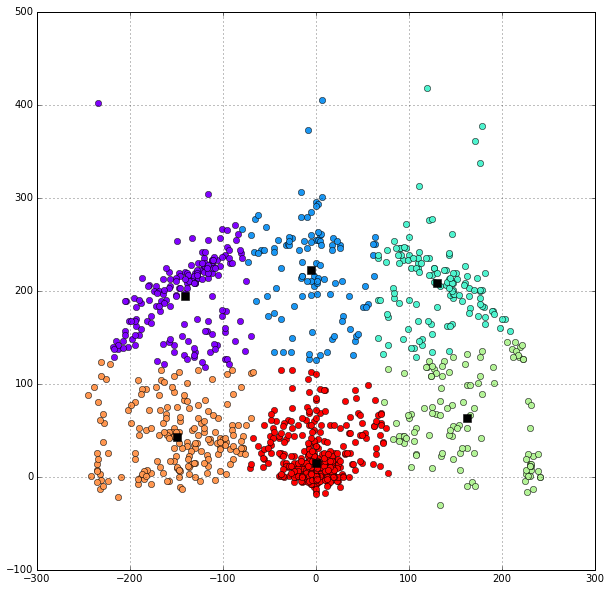

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.figure(figsize=(10,10))

cd=6

centroids,_ = kmeans(data_s1,cd)

idx,_ = vq(data_s1,centroids)

#colors = cm.rainbow(np.linspace(0, 1, cd))
colors=iter(cm.rainbow(np.linspace(0,1,cd)))

for tt in range(cd):
    
    c=next(colors)
    
    #plot(data_s1[idx== tt,0],data_s1[idx== tt,1],'o')
    plt.plot(data_s1[idx== tt,0],data_s1[idx== tt,1],'o', c=c)
    

plt.plot(centroids[:,0],centroids[:,1],'sk',markersize=8)

plt.xlim(-300,300)
plt.ylim(-100,500)

plt.grid()
plt.show()


At this point, we labelled the data using k-means clustering (unsupervised training).  

Notice that the algorithm did a pretty good job, as the zones labelled are very similar to those used in the nba to classify the shot zone area or `shot_df.SHOT_ZONE_AREA` in our dataset.

In [47]:
shot_df.groupby('SHOT_ZONE_AREA').count().GRID_TYPE


SHOT_ZONE_AREA
Back Court(BC)             3
Center(C)                670
Left Side Center(LC)     177
Left Side(L)             181
Right Side Center(RC)    149
Right Side(R)             99
Name: GRID_TYPE, dtype: int64

For completeness, let's plot the original labelled data.

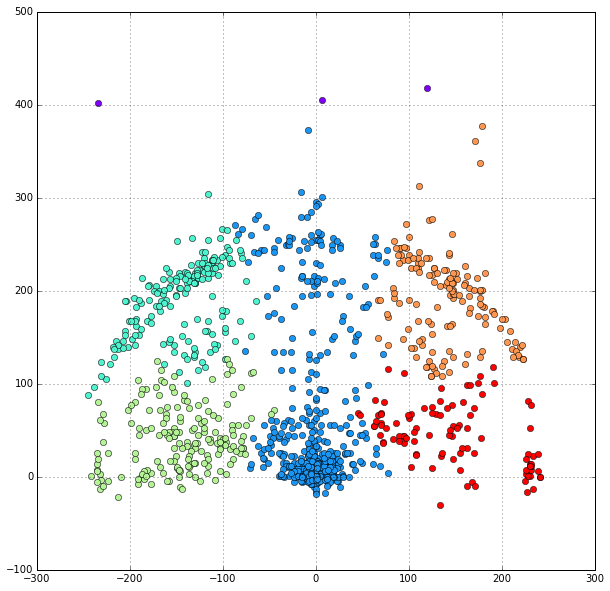

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.figure(figsize=(10,10))

#To plot in the por man's way

#plt.plot(shot_df.LOC_X[shot_df.SHOT_ZONE_AREA == "Back Court(BC)"],shot_df.LOC_Y[shot_df.SHOT_ZONE_AREA == "Back Court(BC)"],'o',color='b')
#plt.plot(shot_df.LOC_X[shot_df.SHOT_ZONE_AREA == "Center(C)"], shot_df.LOC_Y[shot_df.SHOT_ZONE_AREA == "Center(C)"],'o',color='g')
#plt.plot(shot_df.LOC_X[shot_df.SHOT_ZONE_AREA == "Left Side Center(LC)"], shot_df.LOC_Y[shot_df.SHOT_ZONE_AREA == "Left Side Center(LC)"],'o',color='c')
#plt.plot(shot_df.LOC_X[shot_df.SHOT_ZONE_AREA == "Left Side(L)"], shot_df.LOC_Y[shot_df.SHOT_ZONE_AREA == "Left Side(L)"],'o',color='m')
#plt.plot(shot_df.LOC_X[shot_df.SHOT_ZONE_AREA == "Right Side Center(RC)"], shot_df.LOC_Y[shot_df.SHOT_ZONE_AREA == "Right Side Center(RC)"],'o',color='k')
#plt.plot(shot_df.LOC_X[shot_df.SHOT_ZONE_AREA == "Right Side(R)"], shot_df.LOC_Y[shot_df.SHOT_ZONE_AREA == "Right Side(R)"],'o',color='y')

#plt.scatter(missed.LOC_X, missed.LOC_Y, color='red',label='missed',s=20,marker='o',alpha=0.5)


#To plot in the lazy way (smart)

li = ['Back Court(BC)','Center(C)','Left Side Center(LC)','Left Side(L)','Right Side Center(RC)','Right Side(R)']

sets=6

colors=iter(cm.rainbow(np.linspace(0,1,sets)))

#for s in li:
for s,c in zip(li,colors):
    
    plt.plot(shot_df.LOC_X[shot_df.SHOT_ZONE_AREA == s],shot_df.LOC_Y[shot_df.SHOT_ZONE_AREA == s],'o',color=c)

#plt.legend()

plt.xlim(-300,300)
plt.ylim(-100,500)

plt.grid()
plt.show()

and let's use subplots to compare both figure,

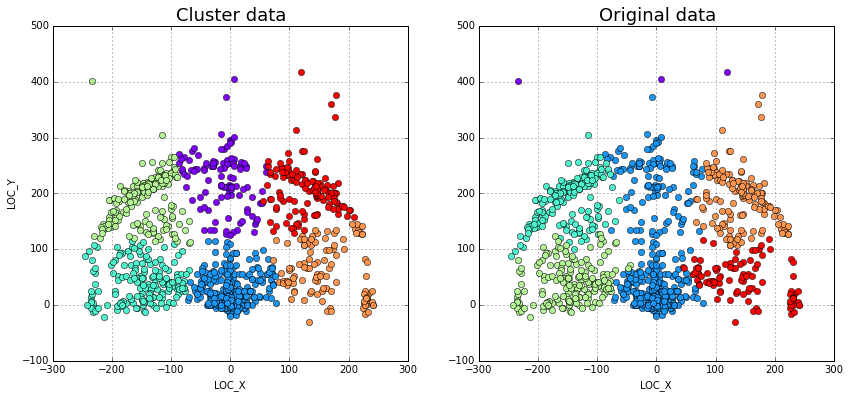

In [49]:
#fig = plt.figure()
plt.figure(figsize=(14, 6))



plt.subplot(121)

cd=6
centroids,_ = kmeans(data_s1,cd)
idx,_ = vq(data_s1,centroids)

colors=iter(cm.rainbow(np.linspace(0,1,cd)))

for tt in range(cd):
    c=next(colors)
    plt.plot(data_s1[idx== tt,0],data_s1[idx== tt,1],'o', c=c)
    
#plt.plot(centroids[:,0],centroids[:,1],'sk',markersize=5)

plt.xlim(-300,300)
plt.ylim(-100,500)

plt.xlabel('LOC_X')
plt.ylabel('LOC_Y')

plt.grid()
plt.title('Cluster data',fontsize=18)



#second plot
plt.subplot(122)

li = ['Back Court(BC)','Center(C)','Left Side Center(LC)','Left Side(L)','Right Side Center(RC)','Right Side(R)']

sets=6
colors=iter(cm.rainbow(np.linspace(0,1,sets)))

for s,c in zip(li,colors):
    plt.plot(shot_df.LOC_X[shot_df.SHOT_ZONE_AREA == s],shot_df.LOC_Y[shot_df.SHOT_ZONE_AREA == s],'o',color=c)

plt.xlim(-300,300)
plt.ylim(-100,500)

plt.xlabel('LOC_X')
#plt.ylabel('LOC_Y')

plt.grid()
plt.title('Original data',fontsize=18)
#plt.subplot(122).set_title("ax3")

plt.show()


### The main take away of this tutorial, is that if your data is not labelled you can use clustering techniques to find hidden structures.


### Finally, I hope you enjoyed this series of tutorials on sport analytics, data scraping, data wrangling, data analysis, exploratory data analysis, advaced plotting and clustering.

# References

[1] https://en.wikipedia.org/wiki/K-means_clustering

[2] http://www.scipy.org/
    
[3] http://matplotlib.org/

[4] http://stanford.edu/~mwaskom/software/seaborn/

[5] http://pandas.pydata.org/

In [50]:
#import sys
#print('Python version:', sys.version_info)

#import IPython
#print('IPython version:', IPython.__version__)

#print('Requests version', requests.__version__)
#print('Pandas version:', pd.__version__)
#print('json version:', json.__version__)

#import matplotlib
#print('matplotlib version:', matplotlib.__version__)

#print('seaborn version:', sns.__version__)

#import scipy
#print('scipy version:', scipy.__version__)